Missing values in each column:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Cost              0
Price             0
Profit            0
Quantity          0
Sales             0
dtype: int64
Summary Statistics:
              Row ID        Order ID                     Order Date  \
count   9794.000000            9794                           9794   
unique          NaN            4921                            NaN   
top             NaN  CA-2018-100111                            NaN   
freq            NaN              14                            NaN   
mean    4902.849295             NaN  2017-05-01 06:15:57.157443584   
min        1.000000             NaN            2015-01-03 00:00:00   
25% 

/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

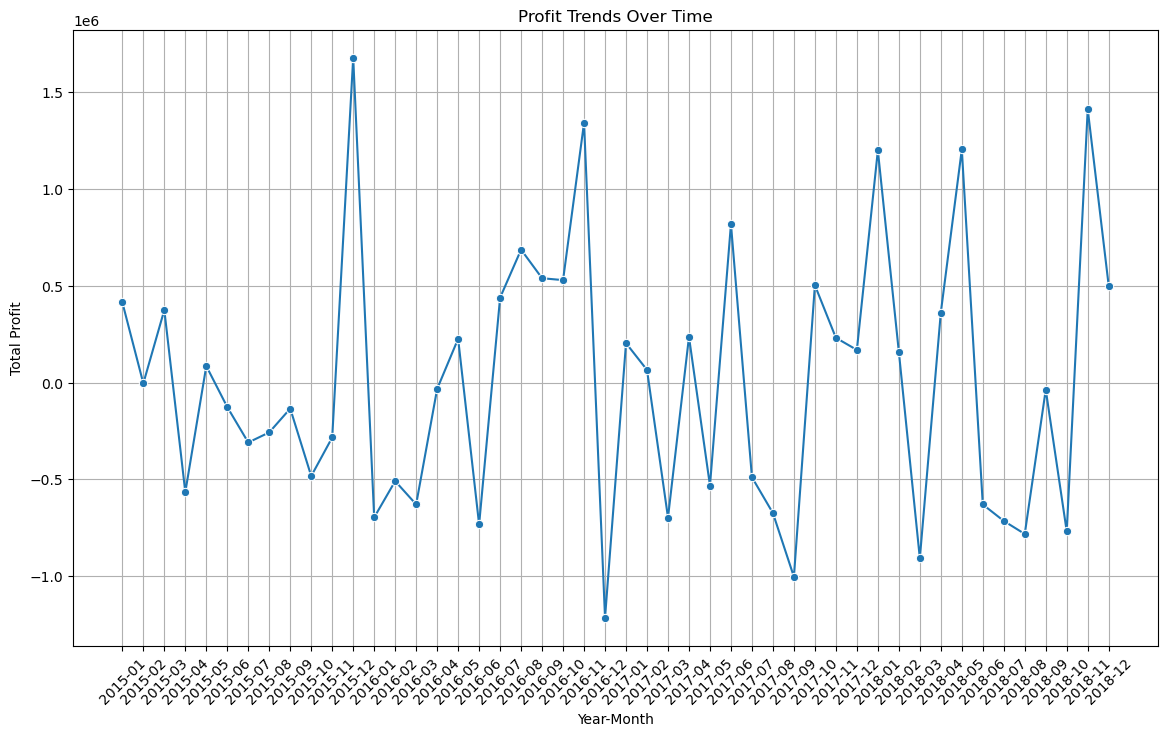

/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

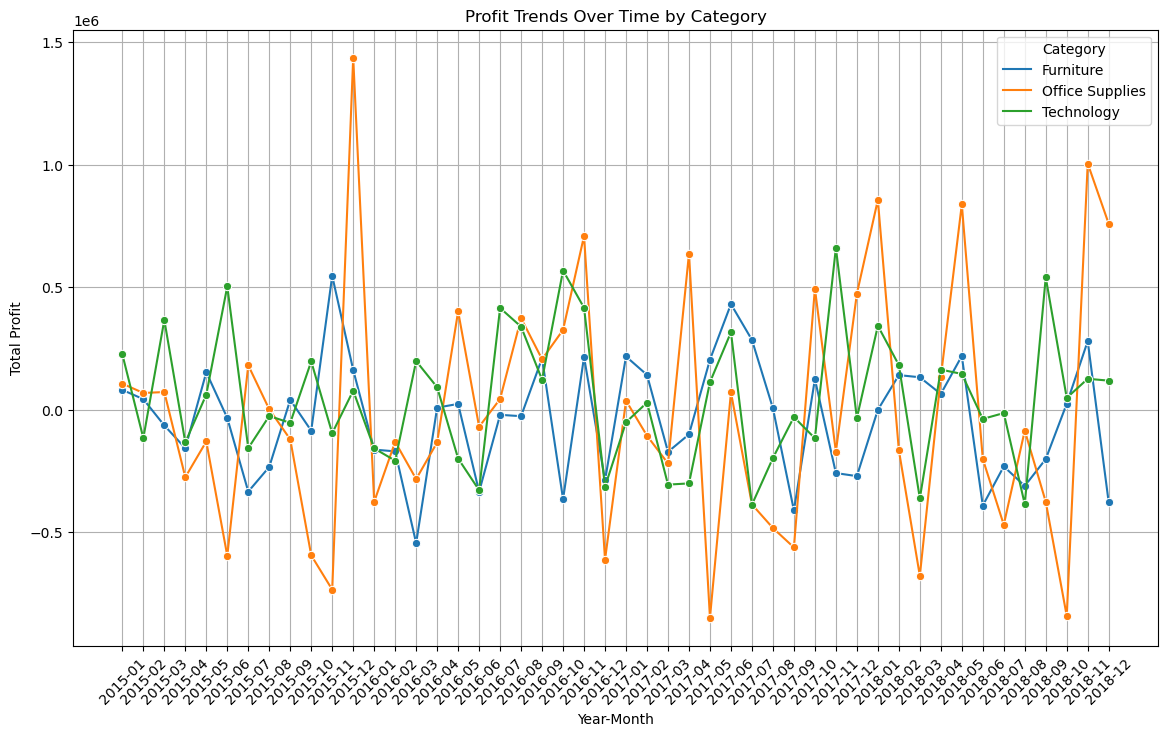

/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


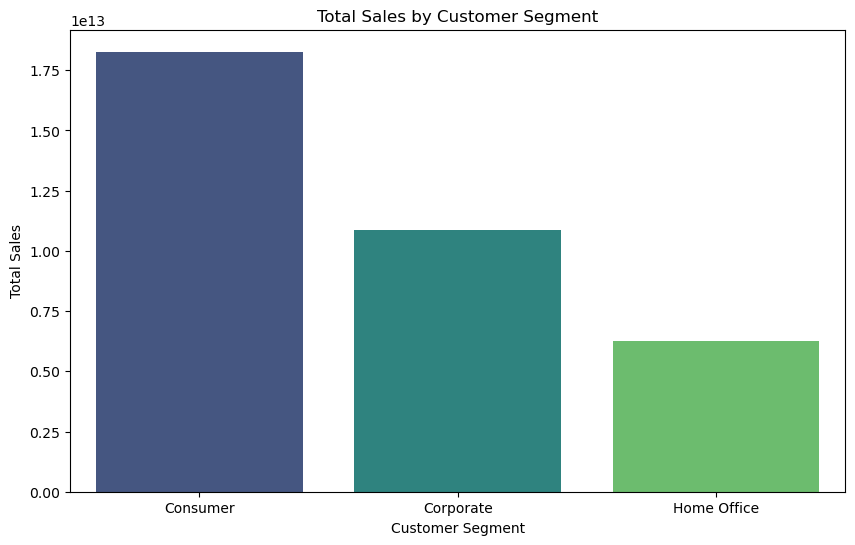

/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

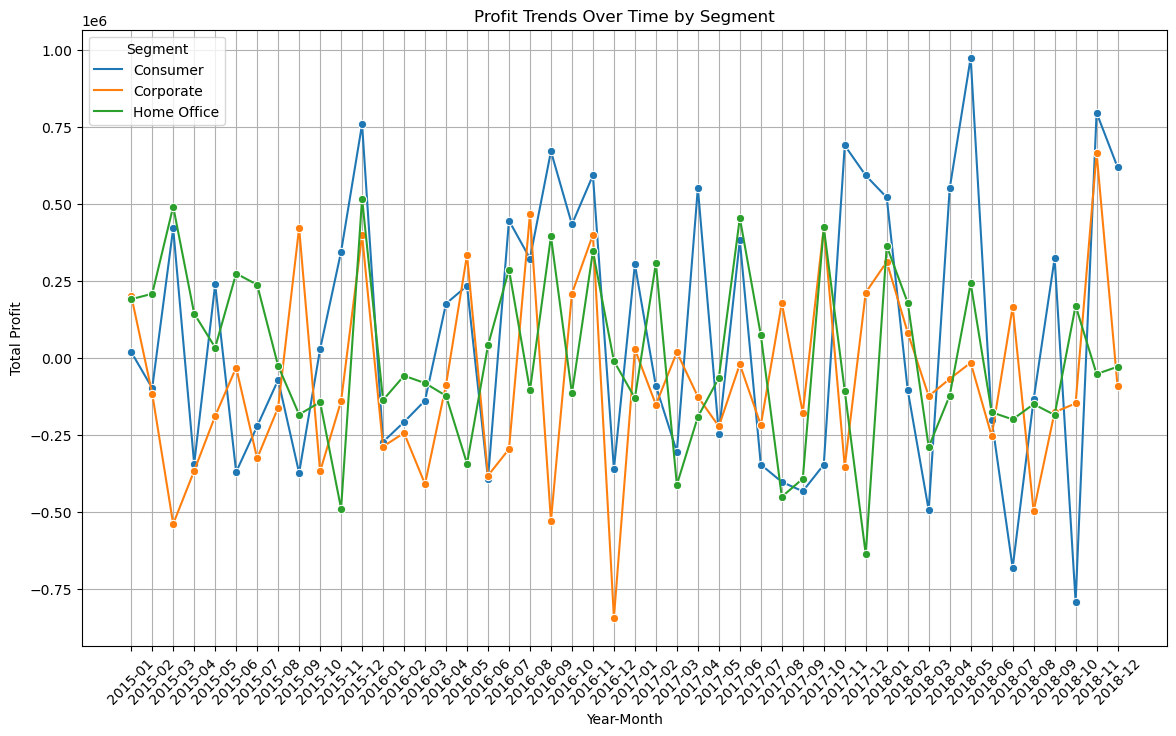

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'data.csv'
data = pd.read_csv(file_path, delimiter=';')

# Correcting Data Types
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%y')

# Convert 'Sales' and 'Profit' to numeric after replacing '.' with ''
data['Sales'] = data['Sales'].str.replace('.', '').astype(float)
data['Profit'] = data['Profit'].astype(str)  # Convert 'Profit' to string type
data['Profit'] = data['Profit'].str.replace('.', '').astype(float)
data['Cost'] = data['Cost'].astype(float)
data['Price'] = data['Price'].astype(float)

# Handling Missing Values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Summary statistics
summary_stats = data.describe(include='all')
print("Summary Statistics:\n", summary_stats)

# Analyzing sales and profit trends
data['YearMonth'] = data['Order Date'].dt.to_period('M')

# Aggregating profit by YearMonth
profit_trends = data.groupby('YearMonth')['Profit'].sum().reset_index()

# Converting 'YearMonth' to string for plotting purposes
profit_trends['YearMonth'] = profit_trends['YearMonth'].astype(str)
# Plotting profit trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='YearMonth', y='Profit', data=profit_trends, marker='o')
plt.title('Profit Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Aggregating profit by YearMonth and Category
profit_trends_category = data.groupby(['YearMonth', 'Category'])['Profit'].sum().reset_index()

# Converting 'YearMonth' to string for plotting purposes
profit_trends_category['YearMonth'] = profit_trends_category['YearMonth'].astype(str)

# Plotting profit trends over time by category
plt.figure(figsize=(14, 8))
sns.lineplot(x='YearMonth', y='Profit', hue='Category', data=profit_trends_category, marker='o')
plt.title('Profit Trends Over Time by Category')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.show()

# Aggregating sales by Segment
sales_by_segment = data.groupby('Segment')['Sales'].sum().reset_index()

# Plotting sales by customer segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=sales_by_segment, palette='viridis')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

# Aggregating profit by YearMonth and Segment
profit_trends_segment = data.groupby(['YearMonth', 'Segment'])['Profit'].sum().reset_index()

# Converting 'YearMonth' to string for plotting purposes
profit_trends_segment['YearMonth'] = profit_trends_segment['YearMonth'].astype(str)

# Plotting profit trends over time by segment
plt.figure(figsize=(14, 8))
sns.lineplot(x='YearMonth', y='Profit', hue='Segment', data=profit_trends_segment, marker='o')
plt.title('Profit Trends Over Time by Segment')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.grid(True)
plt.show()



In [ ]:
###########